In [1]:
import numpy as np 
import pandas as pd 
from numpy.linalg import eig
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates

# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans

In [2]:
import os
# cwd=os.getcwd()
# print(cwd)
os.listdir('/kaggle/input')


['us-election-2020-tweets',
 'lang-uselectiontweets',
 'individual-tweets',
 'trump-tweets']

In [3]:
hashtag_trump = pd.read_csv("/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv",engine ="python")
hashtag_biden = pd.read_csv("/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv",engine ="python")
biden_tweets = pd.read_csv("/kaggle/input/individual-tweets/tweets_of_joe_biden.csv",engine ="python")
trump_tweets = pd.read_json("/kaggle/input/trump-tweets/trump-tweets.json")



### Turning Trump's and Joe's tweets into correct dtypes

In [4]:
print(hashtag_biden.head())
print(hashtag_biden.dtypes)

            created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:18    1.31652929585929e+18   
2  2020-10-15 00:00:20  1.3165293050069524e+18   
3  2020-10-15 00:00:21  1.3165293080815575e+18   
4  2020-10-15 00:00:22   1.316529312741253e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...   0.0            0.0   
2  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...   0.0            0.0   
3  @chrislongview Watching and setting dvr. Let’s...   0.0            0.0   
4  #censorship #HunterBiden #Biden #BidenEmails #...   1.0            0.0   

               source                user_id           user_name  \
0           TweetDeck            360666534.0  El Sol Latino News   
1    Twitter for iPad            809904438.0         Cheri A. 🇺🇸   
2     Twitter Web App           

In [5]:
hashtag_trump['created_at'] = pd.to_datetime(hashtag_trump['created_at'], errors='coerce')
hashtag_trump['collected_at'] = pd.to_datetime(hashtag_trump['collected_at'], errors='coerce')
hashtag_trump['user_join_date'] = pd.to_datetime(hashtag_trump['user_join_date'], errors='coerce')
columns = ['tweet_id', 'likes', 'retweet_count', 'user_id', 'user_followers_count', 'lat', 'long']
hashtag_trump[columns] = hashtag_trump[columns].apply(pd.to_numeric, errors='coerce')
hashtag_trump.dropna(subset=['created_at', 'tweet_id', 'likes', 'retweet_count', 'user_id', 'user_followers_count', 'lat', 'long', 'collected_at'], inplace=True)


hashtag_biden['created_at'] = pd.to_datetime(hashtag_biden['created_at'], errors='coerce')
hashtag_biden['collected_at'] = pd.to_datetime(hashtag_biden['collected_at'], errors='coerce')
hashtag_biden['user_join_date'] = pd.to_datetime(hashtag_biden['user_join_date'], errors='coerce')
hashtag_biden[columns] = hashtag_biden[columns].apply(pd.to_numeric, errors='coerce')
hashtag_biden.dropna(subset=['created_at', 'tweet_id', 'likes', 'retweet_count', 'user_id', 'user_followers_count', 'lat', 'long', 'collected_at'], inplace=True)

# Data Wrangling 

In [6]:
trump= trump_tweets.copy()


In [7]:
trump_deleted = pd.read_json("/kaggle/input/trump-tweets/trump_deleted.json")
trump_deleted
status = list()
id_deleted = list(trump_deleted['id'])
print(id_deleted)
for ids in trump['id']:
    if(ids in id_deleted):
        status.insert(ids,"Deleted")
    else:
        status.insert(ids,"Normal")
status
trump['status'] = status
trump


[1325090748035985408, 1325086590197174272, 1325084492076347392, 1324445863083708416, 1324012948965261312, 1323863787825438720, 1323714481353068544, 1323692146147340288, 1321965155509391360, 1321195996605394944, 1320226451166253056, 1319494198039441408, 1317497136523759616, 1317058851003420672, 1316711680919908352, 1316594633548484608, 1316579572603904000, 1316250377415790592, 1316223657908240384, 1315964956601446400, 1315872126327500800, 1315871989907755008, 1315871867899645952, 1315871590685564928, 1315871589129498624, 1315868183459508224, 1315836801354027008, 1315286705696579584, 1314278414359113728, 1313852035087953920]


,date,favorites,id,isRetweet,retweets,text,status
0,2020-11-07 21:54:48,978022,1325195021339987968,False,157628,"71,000,000 Legal Votes. The most EVER for a si...",Normal
1,2020-11-07 21:53:34,683888,1325194709443080192,False,128595,THE OBSERVERS WERE NOT ALLOWED INTO THE COUNTI...,Normal
2,2020-11-07 15:36:36,1188311,1325099845045071872,False,190721,"I WON THIS ELECTION, BY A LOT!",Normal
3,2020-11-07 15:23:00,295359,1325096422799237120,False,78384,Georgia Counties Using Same Software as Michig...,Normal
4,2020-11-07 15:00:27,27097,1325090748035985408,False,6569,Lawyer’s Press Conference at Four Season’s Lan...,Deleted
...,...,...,...,...,...,...,...
1545,2020-10-07 00:29:24,0,1313637515065204736,True,12897,RT @paulsperry_: BREAKING: An FBI investigator...,Normal
1546,2020-10-07 00:29:06,0,1313637441006383104,True,12288,RT @paulsperry_: BREAKING: Records show Obama'...,Normal
1547,2020-10-06 23:59:57,89191,1313630105831383040,False,20366,Republicans need to get smart and confirm Nate...,Normal
1548,2020-10-06 23:36:46,182368,1313624267842560000,False,46938,Crazy Nancy Pelosi and the Radical Left Democr...,Normal


In [8]:
#We now need to convert all the "favorites" into integers as some are integers and some strings. Pandas might automaticall do this for us
trump = trump.astype({'favorites': 'int'})
trump = trump.astype({'retweets': 'int'})
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1550 non-null   datetime64[ns]
 1   favorites  1550 non-null   int64         
 2   id         1550 non-null   int64         
 3   isRetweet  1550 non-null   bool          
 4   retweets   1550 non-null   int64         
 5   text       1550 non-null   object        
 6   status     1550 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(3), object(2)
memory usage: 74.3+ KB


In [9]:

# Here we have created a trump data set which displays all the deleted tweets. We do this by cross correlating trumps deleted tweets with the list of all his tweets
#The retweets have 0 favourites (which are basically likes) and have an RT at the front 
# To distinquish between the tweets trump deleted and the tweets deleted by twitter (restricted), we make the assumption that whenever a tweet is deleted by twitter the 
# like and retweet numbers are set to 0. We use this to distrinquish 

new_status = list()
for index,val in enumerate(trump['status']):
    list_fav = list(trump['favorites'])
    list_retweets = list(trump['retweets'])
    if(val=="Normal" and list_fav[index]==0 and list_retweets[index] == 0):
        new_status.insert(index, "Restricted")
    else:
        new_status.insert(index,val)
trump['status'] = new_status
trump[trump['status'] == "Deleted"]

            

,date,favorites,id,isRetweet,retweets,text,status
4,2020-11-07 15:00:27,27097,1325090748035985408,False,6569,Lawyer’s Press Conference at Four Season’s Lan...,Deleted
6,2020-11-07 14:43:56,779,1325086590197174272,False,168,Four Season’s Landscaping! https://t.co/kZ6xTF...,Deleted
7,2020-11-07 14:35:36,25919,1325084492076347392,False,7246,"Lawyers Press Conference at Four Seasons, Phil...",Deleted
47,2020-11-05 20:17:55,0,1324445863083708416,True,0,RT @EricTrump: 🚨🚨🚨 The amount of FRAUD being r...,Deleted
66,2020-11-04 15:37:40,0,1324012948965261312,True,0,RT @MattMackowiak: An update gives Biden 100% ...,Deleted
73,2020-11-04 05:44:57,37660,1323863787825438720,False,9797,"We are up BIG, but they are trying to STEAL th...",Deleted
77,2020-11-03 19:51:40,0,1323714481353068544,True,129232,RT @realDonaldTrump: VOTE! VOTE! VOTE!\nhttps:...,Deleted
83,2020-11-03 18:22:55,0,1323692146147340288,True,120074,RT @realDonaldTrump: VOTE! VOTE! VOTE!\nhttps:...,Deleted
391,2020-10-30 00:00:28,41,1321965155509391360,False,6,The Fake News refuses to cover the fact that G...,Deleted
473,2020-10-27 21:04:06,0,1321195996605394944,True,14407,RT @realDonaldTrump: https://t.co/gsFSghkmdM h...,Deleted


The trump data now has a status column which says if the tweet if the tweet is "normal", "Resitrcited" or "deleted".We have also converted all the 'favorites' and the 'retweets' into integers. 

In [10]:
trump.insert(1, 'time', pd.to_datetime(trump['date']).dt.time)
trump.insert(1, 'day', pd.to_datetime(trump['date']).dt.date)
trump = trump[trump['day']>=datetime.date(2020,10,7)]
trump

,date,day,time,favorites,id,isRetweet,retweets,text,status
0,2020-11-07 21:54:48,2020-11-07,21:54:48,978022,1325195021339987968,False,157628,"71,000,000 Legal Votes. The most EVER for a si...",Normal
1,2020-11-07 21:53:34,2020-11-07,21:53:34,683888,1325194709443080192,False,128595,THE OBSERVERS WERE NOT ALLOWED INTO THE COUNTI...,Normal
2,2020-11-07 15:36:36,2020-11-07,15:36:36,1188311,1325099845045071872,False,190721,"I WON THIS ELECTION, BY A LOT!",Normal
3,2020-11-07 15:23:00,2020-11-07,15:23:00,295359,1325096422799237120,False,78384,Georgia Counties Using Same Software as Michig...,Normal
4,2020-11-07 15:00:27,2020-11-07,15:00:27,27097,1325090748035985408,False,6569,Lawyer’s Press Conference at Four Season’s Lan...,Deleted
...,...,...,...,...,...,...,...,...,...
1542,2020-10-07 00:31:06,2020-10-07,00:31:06,0,1313637944574566400,True,22213,RT @paulsperry_: BREAKING: New agent 302s reve...,Normal
1543,2020-10-07 00:30:30,2020-10-07,00:30:30,0,1313637790454820864,True,11746,RT @paulsperry_: BREAKING: According to 302 in...,Normal
1544,2020-10-07 00:30:04,2020-10-07,00:30:04,0,1313637684011773952,True,18723,"RT @paulsperry_: BREAKING: FBI Agent Barnett, ...",Normal
1545,2020-10-07 00:29:24,2020-10-07,00:29:24,0,1313637515065204736,True,12897,RT @paulsperry_: BREAKING: An FBI investigator...,Normal


In [11]:
#We now rename the columns of the trump to match the Biden data below
trump.rename(columns={'date': 'tweet_date', 'day': 'tweet_day', 'time': 'tweet_time', 'favorites':'tweet_like_count','id':'tweet_id', 'retweets':'tweet_retweet_count', 'text':'tweet_content'}, inplace=True)
trump.iloc[::-1].reset_index()

,index,tweet_date,tweet_day,tweet_time,tweet_like_count,tweet_id,isRetweet,tweet_retweet_count,tweet_content,status
0,1546,2020-10-07 00:29:06,2020-10-07,00:29:06,0,1313637441006383104,True,12288,RT @paulsperry_: BREAKING: Records show Obama'...,Normal
1,1545,2020-10-07 00:29:24,2020-10-07,00:29:24,0,1313637515065204736,True,12897,RT @paulsperry_: BREAKING: An FBI investigator...,Normal
2,1544,2020-10-07 00:30:04,2020-10-07,00:30:04,0,1313637684011773952,True,18723,"RT @paulsperry_: BREAKING: FBI Agent Barnett, ...",Normal
3,1543,2020-10-07 00:30:30,2020-10-07,00:30:30,0,1313637790454820864,True,11746,RT @paulsperry_: BREAKING: According to 302 in...,Normal
4,1542,2020-10-07 00:31:06,2020-10-07,00:31:06,0,1313637944574566400,True,22213,RT @paulsperry_: BREAKING: New agent 302s reve...,Normal
...,...,...,...,...,...,...,...,...,...,...
1542,4,2020-11-07 15:00:27,2020-11-07,15:00:27,27097,1325090748035985408,False,6569,Lawyer’s Press Conference at Four Season’s Lan...,Deleted
1543,3,2020-11-07 15:23:00,2020-11-07,15:23:00,295359,1325096422799237120,False,78384,Georgia Counties Using Same Software as Michig...,Normal
1544,2,2020-11-07 15:36:36,2020-11-07,15:36:36,1188311,1325099845045071872,False,190721,"I WON THIS ELECTION, BY A LOT!",Normal
1545,1,2020-11-07 21:53:34,2020-11-07,21:53:34,683888,1325194709443080192,False,128595,THE OBSERVERS WERE NOT ALLOWED INTO THE COUNTI...,Normal


In [12]:
biden_tweets

,username,tweet_id,tweet_url,tweet_date,tweet_content,tweet_retweet_count,tweet_quote_count,tweet_reply_count,tweet_like_count
0,POTUS,1477022943586754560,https://twitter.com/POTUS/status/1477022943586...,2021-12-31 21:04:46+00:00,Betty White brought a smile to the lips of gen...,18567,906,2906,194017
1,POTUS,1476998740833705984,https://twitter.com/POTUS/status/1476998740833...,2021-12-31 19:28:35+00:00,"As we head into 2022, I want folks to remember...",2846,443,2606,16213
2,JoeBiden,1476618089273905158,https://twitter.com/JoeBiden/status/1476618089...,2021-12-30 18:16:01+00:00,This new sinister combination of voter suppres...,9256,716,4097,45657
3,POTUS,1476596766409736195,https://twitter.com/POTUS/status/1476596766409...,2021-12-30 16:51:17+00:00,"When I came into office, our economy was in cr...",9386,2262,14079,67757
4,POTUS,1476579613799337987,https://twitter.com/POTUS/status/1476579613799...,2021-12-30 15:43:08+00:00,"Last year at this time, there were 823,000 Ame...",5639,1071,5085,36613
...,...,...,...,...,...,...,...,...,...
9042,JoeBiden,189339650610036736,https://twitter.com/JoeBiden/status/1893396506...,2012-04-09 13:11:05+00:00,News for you this morning: VP Biden will speak...,52,1,57,16
9043,JoeBiden,189287350034104320,https://twitter.com/JoeBiden/status/1892873500...,2012-04-09 09:43:15+00:00,Campaign staff will run this account to keep y...,57,68,284,45
9044,JoeBiden,189287227321356289,https://twitter.com/JoeBiden/status/1892872273...,2012-04-09 09:42:46+00:00,We're excited to announce that @JoeBiden is be...,80,9,23,24
9045,JoeBiden,543984392,https://twitter.com/JoeBiden/status/543984392,2007-12-29 15:35:26+00:00,"Iowans, there's a good chance there's a Biden ...",36,113,135,124


In [13]:
print(biden_tweets.info())
biden = biden_tweets.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9047 entries, 0 to 9046
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   username             9047 non-null   object
 1   tweet_id             9047 non-null   int64 
 2   tweet_url            9047 non-null   object
 3   tweet_date           9047 non-null   object
 4   tweet_content        9047 non-null   object
 5   tweet_retweet_count  9047 non-null   int64 
 6   tweet_quote_count    9047 non-null   int64 
 7   tweet_reply_count    9047 non-null   int64 
 8   tweet_like_count     9047 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 636.2+ KB
None


In [14]:
#splitting the datetime column to so it splits into two columns- Date and Time (create new column after date for time, and replace old datetime column with just date)

biden.insert(4, 'tweet_time', pd.to_datetime(biden['tweet_date']).dt.time)
biden.insert(4, 'tweet_day', pd.to_datetime(biden['tweet_date']).dt.date)
#drop the tweet_url
biden = biden.drop(columns=['tweet_url'])
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9047 entries, 0 to 9046
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   username             9047 non-null   object
 1   tweet_id             9047 non-null   int64 
 2   tweet_date           9047 non-null   object
 3   tweet_day            9047 non-null   object
 4   tweet_time           9047 non-null   object
 5   tweet_content        9047 non-null   object
 6   tweet_retweet_count  9047 non-null   int64 
 7   tweet_quote_count    9047 non-null   int64 
 8   tweet_reply_count    9047 non-null   int64 
 9   tweet_like_count     9047 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 706.9+ KB


In [15]:
#restricting date for Joe Biden's tweets to be between Oct 07 2020 and Nov 07 2020
biden = biden[(biden['tweet_day']>=datetime.date(2020,10,7)) & (biden['tweet_day']<=datetime.date(2020,11,7))]
biden

,username,tweet_id,tweet_date,tweet_day,tweet_time,tweet_content,tweet_retweet_count,tweet_quote_count,tweet_reply_count,tweet_like_count
2861,JoeBiden,1325118992785223682,2020-11-07 16:52:42+00:00,2020-11-07,16:52:42,"America, I’m honored that you have chosen me t...",576072,147851,212779,3186650
2862,JoeBiden,1324926298762870785,2020-11-07 04:07:00+00:00,2020-11-07,04:07:00,We may be opponents — but we are not enemies. ...,69138,16378,27400,1032046
2863,JoeBiden,1324925795991609348,2020-11-07 04:05:00+00:00,2020-11-07,04:05:00,We have to remember the purpose of our politic...,16607,3002,9800,350044
2864,JoeBiden,1324925040660393987,2020-11-07 04:02:00+00:00,2020-11-07,04:02:00,I know tensions can be high after a tough elec...,17081,2409,8633,356811
2865,JoeBiden,1324924538749026306,2020-11-07 04:00:00+00:00,2020-11-07,04:00:00,We are going to be the first Democrats to win ...,20796,2442,5512,324114
...,...,...,...,...,...,...,...,...,...,...
3462,JoeBiden,1313663334286323714,2020-10-07 02:12:00+00:00,2020-10-07,02:12:00,Please. https://t.co/acHR1Rf8hE,23439,6481,11101,177744
3463,JoeBiden,1313652765319557122,2020-10-07 01:30:00+00:00,2020-10-07,01:30:00,I can’t wait for @KamalaHarris to make history...,3752,192,1915,25759
3464,JoeBiden,1313646473393840128,2020-10-07 01:05:00+00:00,2020-10-07,01:05:00,"Ignore the polls, folks. There’s too much at s...",25575,1714,3779,117089
3465,JoeBiden,1313641691602202624,2020-10-07 00:46:00+00:00,2020-10-07,00:46:00,Think about what it takes for a Black person t...,10190,864,2654,50420


In [16]:
#check that the tweets came from the same account- Joe Biden
biden["username"].unique()

array(['JoeBiden'], dtype=object)

In [17]:
#We now reindex the biden data set to start from 0
biden = biden.sort_values(by=['tweet_date'], ascending=True)
biden.reset_index()

,index,username,tweet_id,tweet_date,tweet_day,tweet_time,tweet_content,tweet_retweet_count,tweet_quote_count,tweet_reply_count,tweet_like_count
0,3466,JoeBiden,1313633890289045504,2020-10-07 00:15:00+00:00,2020-10-07,00:15:00,"Look, folks, I'm going to be honest: we'll try...",3726,451,2005,18567
1,3465,JoeBiden,1313641691602202624,2020-10-07 00:46:00+00:00,2020-10-07,00:46:00,Think about what it takes for a Black person t...,10190,864,2654,50420
2,3464,JoeBiden,1313646473393840128,2020-10-07 01:05:00+00:00,2020-10-07,01:05:00,"Ignore the polls, folks. There’s too much at s...",25575,1714,3779,117089
3,3463,JoeBiden,1313652765319557122,2020-10-07 01:30:00+00:00,2020-10-07,01:30:00,I can’t wait for @KamalaHarris to make history...,3752,192,1915,25759
4,3462,JoeBiden,1313663334286323714,2020-10-07 02:12:00+00:00,2020-10-07,02:12:00,Please. https://t.co/acHR1Rf8hE,23439,6481,11101,177744
...,...,...,...,...,...,...,...,...,...,...,...
601,2865,JoeBiden,1324924538749026306,2020-11-07 04:00:00+00:00,2020-11-07,04:00:00,We are going to be the first Democrats to win ...,20796,2442,5512,324114
602,2864,JoeBiden,1324925040660393987,2020-11-07 04:02:00+00:00,2020-11-07,04:02:00,I know tensions can be high after a tough elec...,17081,2409,8633,356811
603,2863,JoeBiden,1324925795991609348,2020-11-07 04:05:00+00:00,2020-11-07,04:05:00,We have to remember the purpose of our politic...,16607,3002,9800,350044
604,2862,JoeBiden,1324926298762870785,2020-11-07 04:07:00+00:00,2020-11-07,04:07:00,We may be opponents — but we are not enemies. ...,69138,16378,27400,1032046


#### Removing tweets with both hashtags

In [18]:
#Find tweets which hashtag both
hashtag_both = hashtag_trump.merge(hashtag_biden, how='inner', on='tweet_id')
#hashtag_both.shape|

In [19]:
#Remove common tweets from each dataset
hashtag_justbiden = hashtag_biden[~hashtag_biden['tweet_id'].isin(hashtag_both.tweet_id)]
hashtag_justtrump = hashtag_trump[~hashtag_trump['tweet_id'].isin(hashtag_both.tweet_id)]


#### Grouping by state

In [20]:
US = ['United States of America']

#Biden location groupping
B_US_df = hashtag_biden.loc[hashtag_biden['country'].isin(US)]
B_US_df.insert(1, 'tweet_time', pd.to_datetime(B_US_df['created_at']).dt.time)
B_US_df.insert(1, 'tweet_day', pd.to_datetime(B_US_df['created_at']).dt.date)
B_US_df = B_US_df.astype({'likes': 'float'})
to_c_filter = ['tweet_id', 'user_id', 'user_name', 'user_location', 'user_screen_name', 'user_description', 'user_join_date', 'city', 'continent', 'state_code']
for cf in to_c_filter:
    B_US_df = B_US_df.drop(labels = cf, axis = 1)
B_groupped_by_states = B_US_df.groupby('state')

#Trump location groupping
T_US_df = hashtag_trump.loc[hashtag_trump['country'].isin(US)]
T_US_df.insert(1, 'tweet_time', pd.to_datetime(T_US_df['created_at']).dt.time)
T_US_df.insert(1, 'tweet_day', pd.to_datetime(T_US_df['created_at']).dt.date)
T_US_df = T_US_df.astype({'likes': 'float'})
to_c_filter = ['tweet_id', 'user_id', 'user_name', 'user_location', 'user_screen_name', 'user_description', 'user_join_date', 'city', 'continent', 'state_code']
for cf in to_c_filter:
    T_US_df = T_US_df.drop(labels = cf, axis = 1)
T_groupped_by_states = T_US_df.groupby('state')



#B_groupped_by_states.first()
#T_groupped_by_states.first()

#Might need to remove these depending on what do we want to do, because they are not states.
#District of Columbia? has a place in the electoral college?
#Puerto Rico
#Northern Marianna islands
#Guam


0         0.0
2         0.0
4         1.0
6         0.0
11        0.0
         ... 
777048    0.0
777049    0.0
777052    0.0
777057    0.0
777059    1.0
Name: likes, Length: 153595, dtype: float64


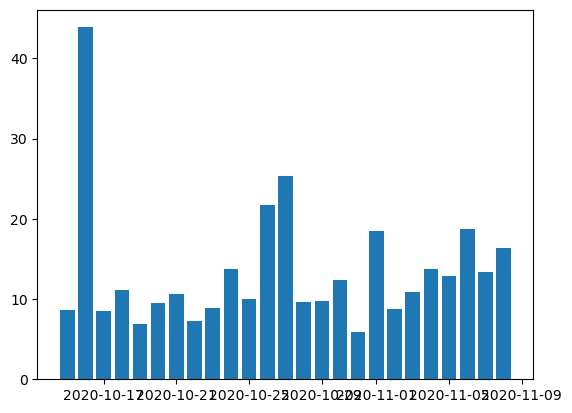

In [21]:
#Plot likes against time for Biden
B_US_df['created_at'] = pd.to_datetime(B_US_df['created_at'])
B_US_df['likes'] = B_US_df['likes'].astype(float)
B_US_df['user_followers_count'] = B_US_df['user_followers_count'].astype(float)

B_US_df_likes = B_US_df[['created_at', 'likes']]       
#B_US_df_likes['likes'] = B_US_df['likes'] / B_US_df['user_followers_count']
print(B_US_df_likes['likes'])
df = B_US_df_likes.groupby(B_US_df_likes['created_at'].dt.date).mean().reset_index()
plt.bar(df['created_at'], df['likes'])



T_US_df['created_at'] = pd.to_datetime(T_US_df['created_at'])
#print(T_US_df.groupby(T_US_df['created_at'].dt.date).sum(axis=0))

#sc = hashtag_justbiden.plot.scatter(x='')

# Exploration 

datetime.date(2020, 10, 7)

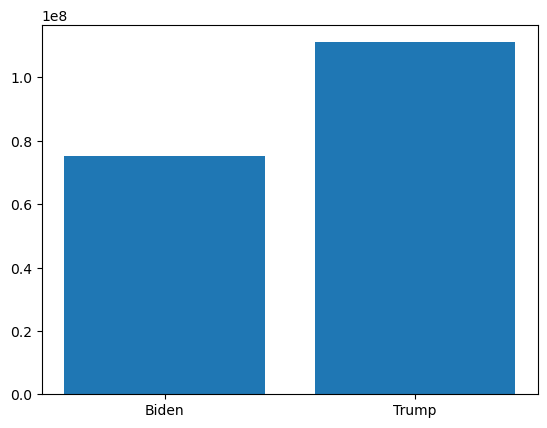

In [22]:
candidate = list(["Biden","Trump"])
likes = list([biden['tweet_like_count'].sum(),trump['tweet_like_count'].sum()])
plt.bar(candidate, likes)
#Graph shows total number of likes for each candidate
list(biden['tweet_day'])[0]


In [23]:
#removed the tweets with zero likes (restricted and retweeted) as these accounted only for aprx 50/1500 data points.
# We did this because we want to analyse the ratio of retweets to likes. Having 0 likes provides no information. 
biden_tweet_retweet_ratio = biden.copy()
intermediate = trump[trump['isRetweet'] == False]
trump_tweet_retweet_ratio = intermediate[intermediate["status"] != "Restricted"]


In [24]:
#We now attempt to see about how the engagment with each candidate evolves over each time by looking at retweet to tweet like ratio
ratio_biden = list()
for i in range(len(biden_tweet_retweet_ratio['tweet_id'])):
    ratio_biden.insert(i,list(biden_tweet_retweet_ratio['tweet_retweet_count'])[i]/list(biden_tweet_retweet_ratio['tweet_like_count'])[i])
ratio_trump = list()
for i in range(len(trump_tweet_retweet_ratio['tweet_id'])):
    ratio_trump.insert(i,list(trump_tweet_retweet_ratio['tweet_retweet_count'])[i]/list(trump_tweet_retweet_ratio['tweet_like_count'])[i])

        
biden_tweet_retweet_ratio['retweet_tweet_like_ratio'] = ratio_biden
trump_tweet_retweet_ratio['retweet_tweet_like_ratio'] = ratio_trump
end = list(trump_tweet_retweet_ratio['tweet_day'])[0]
start = list(trump_tweet_retweet_ratio['tweet_day'])[-1]
increment = datetime.timedelta(days=1)
ratio_biden_average = list()
ratio_trump_average = list()
dates = trump_tweet_retweet_ratio['tweet_day'].unique()
index=0
while(start <= end):
    average_biden = biden_tweet_retweet_ratio.loc[(biden_tweet_retweet_ratio['tweet_day'] == start), 'retweet_tweet_like_ratio'].mean()
    average_trump = trump_tweet_retweet_ratio.loc[(trump_tweet_retweet_ratio['tweet_day'] == start), 'retweet_tweet_like_ratio'].mean()
    ratio_biden_average.insert(index,average_biden)
    ratio_trump_average.insert(index,average_trump)
    index+=1
    start += increment 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


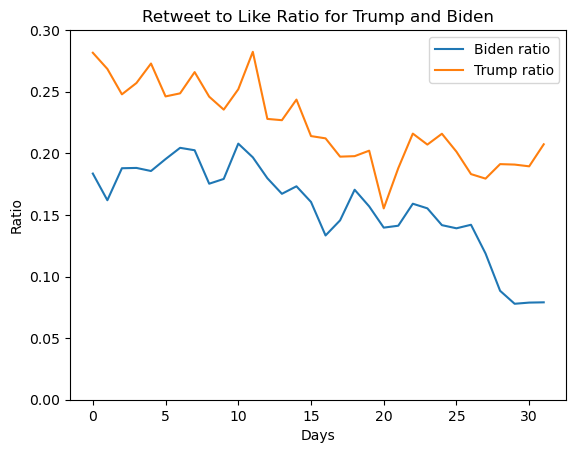

In [25]:
plt.figure(2)
plt.plot(ratio_biden_average,label='Biden ratio')
plt.ylim(0, 0.3)
plt.plot(ratio_trump_average, label="Trump ratio")
plt.ylim(0, 0.3)
plt.xlabel("Days")
plt.ylabel("Ratio")
plt.title("Retweet to Like Ratio for Trump and Biden")
plt.legend()
plt.show()

In [26]:
# Here we explore the #Trump and #Biden dataset. We will look into activity of each state and compare this to known events which take place.
T_state_df = T_US_df[T_US_df['state'] == 'California'] # Change this state value to change the graphs
B_state_df = B_US_df[B_US_df['state'] == 'California']
start = list(T_US_df['tweet_day'])[0]
end = list(T_US_df['tweet_day'])[-1]
increment = datetime.timedelta(days=1)
index = 0
Trump_number_tweets_list = list()
Trump_number_likes_list = list()
Biden_number_tweets_list = list()
Biden_number_likes_list = list()
while(start<=end):
    
    Trump_data_for_day = T_state_df[T_state_df['tweet_day'] == start]
    Biden_data_for_day = B_state_df[B_state_df['tweet_day'] == start]
    # Add trump data to lists 
    Trump_number_tweets = len(Trump_data_for_day)
    Trump_number_tweets_list.insert(index, Trump_number_tweets)
    Trump_number_likes_list.insert(index, Trump_data_for_day['likes'].sum())
    #Add Biden data to lists 
    Biden_number_tweets = len(Biden_data_for_day)
    Biden_number_tweets_list.insert(index, Biden_number_tweets)
    Biden_number_likes_list.insert(index, Biden_data_for_day['likes'].sum())
    index+=1
    start += increment

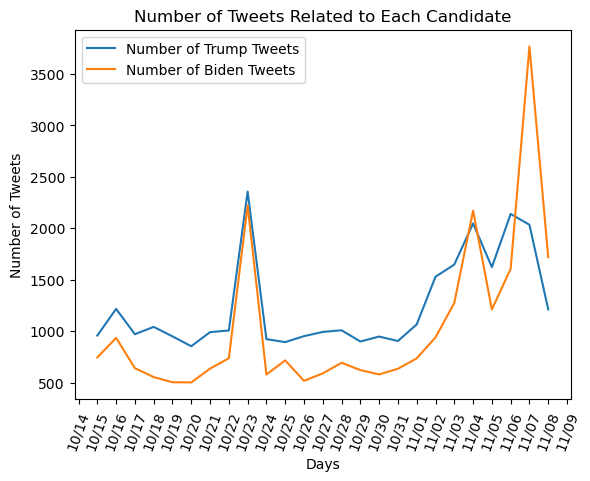

In [27]:
# Final US debate was on the 22nd hence the spike on the 23rd in most states. 
dates_trump = T_US_df['tweet_day'].unique()
# Total number of likes related to trump day by day for a generic state
plt.figure(3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(dates_trump,Trump_number_tweets_list, label='Number of Trump Tweets')
plt.plot(dates_trump, Biden_number_tweets_list,label='Number of Biden Tweets')
plt.xticks(rotation=70)
plt.title("Number of Tweets Related to Each Candidate")
plt.xlabel("Days") # from 15th octobre to 8th Nov
plt.ylabel("Number of Tweets")
plt.legend()
plt.show()
# Large spike at end for Biden probably related to him winning the election. 

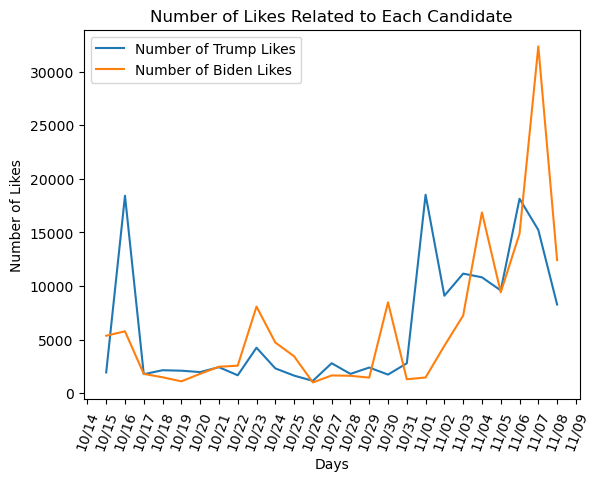

In [28]:

dates_trump = T_US_df['tweet_day'].unique()
plt.figure(4)

# Total number of likes related to trump day by day for a generic state
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.plot(dates_trump,Trump_number_likes_list, label='Number of Trump Likes')
plt.plot(dates_trump, Biden_number_likes_list,label='Number of Biden Likes')
plt.xticks(rotation=70)
plt.title("Number of Likes Related to Each Candidate")
plt.xlabel("Days") # from 15th octobre to 8th Nov
plt.ylabel("Number of Likes")
plt.legend()
plt.show()
# This graph shows the sum of likes relating to trump and biden everyday. This provides some insite into the popularity of each candidate



In [29]:
# Here we plot the number of tweets made with #Trump on an hour by hour basis. We then plot the time of the most liked trump tweets to see if there is a correlation between his influential tweets and activity. 

hashtag_biden_us = hashtag_biden.loc[hashtag_biden['country'].isin(US)]
hashtag_trump_us = hashtag_trump.loc[hashtag_trump['country'].isin(US)]

hashtag_trump_date_tweet = hashtag_trump_us[['created_at', 'tweet']]
hashtag_biden_date_tweet = hashtag_biden_us[['created_at', 'tweet']]
[['created_at', 'tweet']]


trump_hour_tweet = hashtag_trump_date_tweet.groupby([hashtag_trump_date_tweet['created_at'].dt.date, hashtag_trump_date_tweet['created_at'].dt.hour]).count().drop(columns = {'created_at'})
biden_hour_tweet = hashtag_biden_date_tweet.groupby([hashtag_biden_date_tweet['created_at'].dt.date, hashtag_biden_date_tweet['created_at'].dt.hour]).count().drop(columns = {'created_at'})
trump_hour_tweet.index.names = ['date', 'hour']
biden_hour_tweet.index.names = ['date', 'hour']
trump_hour_tweet.reset_index(inplace=True)
biden_hour_tweet.reset_index(inplace=True)

trump_hour_tweet["date_hour"] = trump_hour_tweet[["date", "hour"]].apply((lambda x: str(x['date'])+ ' ' + (str(x['hour']))), axis =1)
biden_hour_tweet["date_hour"] = biden_hour_tweet[["date", "hour"]].apply((lambda x: str(x['date'])+ ' ' + (str(x['hour']))), axis =1)
fig1 = px.line(trump_hour_tweet, x='date_hour', y='tweet')

trump_no_retweets = trump[(trump['isRetweet'] == False) & (trump['tweet_date'].dt.date>= datetime.date(2020,10,15)) & (trump['tweet_date'].dt.date<=datetime.date(2020,11,8))]
first_likes = trump_no_retweets.sort_values(by = ['tweet_like_count'], ascending=False).head(50)
first_likes['date_hour'] = first_likes.apply((lambda x: str(x['tweet_day'])+ ' ' + (str(x['tweet_date'].hour))), axis =1)
first_likes
for i in first_likes['date_hour']:
    fig1.add_vline(i, line_width=1, line_color="red")

    
fig1

In [30]:
# This graph shows the number of tweets wth #trump on an hour basis. We also plot the dates of the restricted trump tweets. 
fig2 = px.line(trump_hour_tweet, x='date_hour', y='tweet')
trump_no_retweets = trump[(trump['isRetweet'] == False) & (trump['tweet_date'].dt.date>= datetime.date(2020,10,15)) & (trump['tweet_date'].dt.date<=datetime.date(2020,11,8))]
first_likes = trump_no_retweets[(trump_no_retweets['status'] == 'Restricted')| (trump_no_retweets['status'] == 'Deleted')]
first_likes['date_hour'] = first_likes.apply((lambda x: str(x['tweet_day'])+ ' ' + (str(x['tweet_date'].hour))), axis =1)
first_likes
for i in first_likes['date_hour']:
    fig2.add_vline(i, line_width=1, line_color="red")

    
fig2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
#This shows the number of #biden tweets relating on hour basis
fig3 = px.line(biden_hour_tweet,x='date_hour', y=['tweet'])

fig3

# 
- Looking at the Daily tweet count, retweets on both the candidates

In [32]:
biden_per_day = pd.DataFrame(biden["tweet_day"].value_counts())
biden_per_day = biden_per_day.sort_index()
#biden_per_day.insert(0, "Date", biden["tweet_day"].unique())
biden_per_day = biden_per_day.rename(columns={"tweet_day":"Tweet_Count"})
biden_per_day.reindex()

likes = list()
retweet = list()
for i in biden_per_day.index:
    likes.append(biden.loc[biden['tweet_day'] == i]["tweet_like_count"].sum())
    retweet.append(biden.loc[biden['tweet_day'] == i]["tweet_retweet_count"].sum())
biden_per_day["Number_of_Likes"] = likes
biden_per_day["Number_of_Retweets"] = retweet
biden_per_day

,Tweet_Count,Number_of_Likes,Number_of_Retweets
2020-10-07,14,1204864,172550
2020-10-08,18,4536191,667551
2020-10-09,14,1811152,275619
2020-10-10,11,827074,124542
2020-10-11,10,1417068,227081
2020-10-12,12,1102354,188962
2020-10-13,15,1506025,212303
2020-10-14,15,1610577,243240
2020-10-15,19,1418404,212507
2020-10-16,25,1903424,284182


In [33]:
trump_per_day = pd.DataFrame(trump["tweet_day"].value_counts())
trump_per_day = trump_per_day.sort_index()
trump_per_day = trump_per_day.rename(columns={"tweet_day":"Tweet_Count"})
trump_per_day.reindex()

likes = list()
retweet = list()
for i in trump_per_day.index:
    likes.append(trump.loc[trump['tweet_day'] == i]["tweet_like_count"].sum())
    retweet.append(trump.loc[trump['tweet_day'] == i]["tweet_retweet_count"].sum())
trump_per_day["Number_of_Likes"] = likes
trump_per_day["Number_of_Retweets"] = retweet
trump_per_day

,Tweet_Count,Number_of_Likes,Number_of_Retweets
2020-10-07,104,5631519,2505910
2020-10-08,44,3957250,1266265
2020-10-09,37,3148745,892288
2020-10-10,9,510376,238163
2020-10-11,29,1694506,532495
2020-10-12,109,6239402,2094000
2020-10-13,91,3187812,1207028
2020-10-14,30,2251003,777860
2020-10-15,60,3443403,1163634
2020-10-16,78,2093878,988785


In [34]:
ave_biden_tweets = biden_per_day["Tweet_Count"].mean()
ave_trump_tweets = trump_per_day["Tweet_Count"].mean()
ratio_biden_trump_tweets = ave_biden_tweets/ave_trump_tweets
ratio_biden_trump_tweets


0.39172592113768584

### Map of the total number of tweets based on the state of the user

In [35]:
hashtag_biden_us = hashtag_biden.loc[hashtag_biden['country'].isin(US)]
hashtag_trump_us = hashtag_trump.loc[hashtag_trump['country'].isin(US)]
hashtag_trump_loc_tweet = hashtag_trump_us[['tweet', 'state_code']]
hashtag_biden_loc_tweet = hashtag_biden_us[['tweet', 'state_code']]

hashtag_trump_loc_tweet = hashtag_trump_loc_tweet.groupby('state_code').count().reset_index()
hashtag_biden_loc_tweet = hashtag_biden_loc_tweet.groupby('state_code').count().reset_index()


In [36]:
tweet_trump_map = px.choropleth(hashtag_trump_loc_tweet,
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='tweet',
                    color_continuous_scale="YlOrBr",
                    range_color = [0, 30000]
                    
                    )
tweet_trump_map.show()

In [37]:
tweet_biden_map = px.choropleth(hashtag_biden_loc_tweet,
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='tweet',
                    color_continuous_scale="YlOrBr", 
                    range_color = [0, 30000]
                    
                    )
tweet_biden_map.show()

### Number of Tweets each day

In [38]:
hashtag_trump_date_tweet = hashtag_trump_us[['created_at', 'tweet']]
hashtag_biden_date_tweet = hashtag_biden_us[['created_at', 'tweet']]

trump_date_tweet = hashtag_trump_date_tweet.groupby(hashtag_trump_date_tweet['created_at'].dt.date).count().drop(columns={'created_at'}).reset_index()
biden_date_tweet = hashtag_biden_date_tweet.groupby(hashtag_biden_date_tweet['created_at'].dt.date).count().drop(columns={'created_at'}).reset_index()


In [39]:
trump_date_tweet_bar = px.bar(trump_date_tweet, x='created_at', y='tweet')
trump_date_tweet_bar.show()

In [40]:

biden_date_tweet_bar = px.bar(biden_date_tweet, x='created_at', y='tweet')
biden_date_tweet_bar.show()

In [41]:
hashtag_trump_loc_tweet = hashtag_trump_us[['created_at', 'tweet', 'state_code']]
hashtag_biden_loc_tweet = hashtag_biden_us[['created_at', 'tweet', 'state_code']]

trump_date_tweet = hashtag_trump_loc_tweet.groupby([hashtag_trump_loc_tweet['created_at'].dt.date, 'state_code']).count().drop(columns={'created_at'}).reset_index()
biden_date_tweet = hashtag_biden_loc_tweet.groupby([hashtag_biden_loc_tweet['created_at'].dt.date, 'state_code']).count().drop(columns={'created_at'}).reset_index()


In [42]:
trump_date_tweet_map = px.choropleth(trump_date_tweet, # dataset to use
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='tweet',
                    color_continuous_scale="YlOrBr", 
                    range_color = [0, 3768],
                    animation_frame ="created_at"
                   )
trump_date_tweet_map.show()

In [43]:
biden_date_tweet_map = px.choropleth(biden_date_tweet, # dataset to use
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='tweet',
                    color_continuous_scale="YlOrBr", 
                    range_color = [0, 3768],
                    animation_frame ="created_at"
                   )
biden_date_tweet_map.show()

### Number of likes (normalised by tweet) compared to date collected

In [44]:
hashtag_trump_collected_like = hashtag_trump_us[['collected_at', 'likes']]
hashtag_biden_collected_like = hashtag_biden_us[['collected_at', 'likes']]

hashtag_trump_collected_tweet = hashtag_trump_us[['collected_at', 'tweet']]
hashtag_biden_collected_tweet = hashtag_biden_us[['collected_at', 'tweet']]


trump_collected_like = hashtag_trump_collected_like.groupby(hashtag_trump_collected_like['collected_at'].dt.date).sum().reset_index()
biden_collected_like = hashtag_biden_collected_like.groupby(hashtag_biden_collected_like['collected_at'].dt.date).sum().reset_index()

trump_collected_tweet = hashtag_trump_collected_tweet.groupby(hashtag_trump_collected_tweet['collected_at'].dt.date).count().drop(columns={'collected_at'}).reset_index()
biden_collected_tweet = hashtag_biden_collected_tweet.groupby(hashtag_biden_collected_tweet['collected_at'].dt.date).count().drop(columns={'collected_at'}).reset_index()

trump_collected_like['likes'] = trump_collected_like['likes'] / trump_collected_tweet['tweet']
biden_collected_like['likes'] = biden_collected_like['likes'] / biden_collected_tweet['tweet']

In [45]:
trump_collected_like_bar = px.bar(trump_collected_like, x='collected_at', y='likes')
trump_collected_like_bar.show()

In [46]:
biden_collected_like_bar = px.bar(biden_collected_like, x='collected_at', y='likes')
biden_collected_like_bar.show()

### Follower Count against Retweets

In [47]:
hashtag_trump_follower_retweet = hashtag_trump_us[['user_id', 'user_followers_count', 'retweet_count']]
hashtag_biden_follower_retweet = hashtag_biden_us[['user_id', 'user_followers_count', 'retweet_count']]

trump_follower_retweet = hashtag_trump_follower_retweet.groupby(["user_id"]).sum()
biden_follower_retweet = hashtag_biden_follower_retweet.groupby(["user_id"]).sum()

print(trump_follower_retweet)

              user_followers_count  retweet_count
user_id                                          
5.310000e+02                5853.0            0.0
2.654000e+03              107761.0            0.0
3.471000e+03               16818.0            0.0
1.341000e+04               37092.0            0.0
1.341300e+04               26558.0            7.0
...                            ...            ...
1.325471e+18                  25.0            0.0
1.325492e+18                   1.0            0.0
1.325521e+18                   1.0            0.0
1.325533e+18                  37.0            0.0
1.325569e+18                   0.0            0.0

[41839 rows x 2 columns]


In [48]:
follower_retweet_scatter = px.scatter(trump_follower_retweet, x="user_followers_count", y="retweet_count")


follower_retweet_scatter.add_scatter(x=biden_follower_retweet["user_followers_count"], y=biden_follower_retweet["retweet_count"], mode= 'markers')

follower_retweet_scatter.show()


### Tweets by different platforms

In [49]:
hashtag_trump_tweet_platform = hashtag_trump_us[['source', 'tweet']]
hashtag_biden_tweet_platform = hashtag_biden_us[['source', 'tweet']]

trump_source_tweet = hashtag_trump_tweet_platform.groupby(["source"]).count().reset_index()
biden_source_tweet = hashtag_biden_tweet_platform.groupby(["source"]).count().reset_index()

In [50]:
px.bar(trump_source_tweet, x='source', y='tweet').show()

In [51]:
px.bar(biden_source_tweet, x='source', y='tweet').show()

### Number of times trump was mentioned in hashtag biden vs number of times biden was mentioned in hashtag trump

In [52]:
#hashtag_trump_containing_biden = hashtag_justtrump[hashtag_justtrump['tweet'].str.contains("biden|Biden")][['tweet']]
#hashtag_biden_containing_trump = hashtag_justbiden[hashtag_justbiden['tweet'].str.contains("trump|Trump")][['tweet']]

#px.bar(x=['Trump Containing Biden', 'Biden Containing Trump'], y = [hashtag_trump_containing_biden['tweet'],hashtag_biden_containing_trump['tweet']]).show()

### Languages of tweets

In [53]:
#Use langdetect to determine language of tweets - doing on sample initially as takes long time to run
!pip install langdetect # enable internet on sidebar for this to work
from langdetect import detect

def get_lang(tweet):
    try:
        language = detect(tweet)
    except:
        language = 'n/a'
    return language

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 26.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=61bce70c25af0284870ee2ffc01234f947d45ad4fd3e89d33f5bb9b407972099
  Stored in directory: /root/.cache/pip/wheels/73/b2/db/0c9b9eb7a44bf85ec0b42c06ee617d0a0de66840dc0b3248d1
Successfully built langdetect


Running on sample of 5000 tweets to test graph functionality. Plan is to run on whole dataset once and save to csv - will take 30min+ est so desirable to do only once.

Code below to run on whole dataset, will save to csv - uncomment if you hate yourself. Add lang-uselectiontweets to input data for inputs to work.

In [54]:
#Uncomment to run on whole dataset - this will take ages! once in output folder just uncomment read in line instead
from pathlib import Path
out= '../output' # folder to save intermediary data to
Path(out).mkdir(parents=True, exist_ok=True)

#This runs language analysis on whole dataset -  DO NOT RUN WILL TAKE 1MILLION HOURS
#Run separately on each dataset so can use 
#lang_B = B_US_df[['tweet_id','tweet', 'state_code']].copy()
#lang_B['language']  = B_US_df[['tweet_id','tweet', 'state_code']].tweet.apply(lambda i:get_lang(i))
#lang_B.to_csv(out + '/lang_Biden.csv', index=False)
#lang_T = T_US_df[['tweet_id','tweet', 'state_code']].copy()
#lang_T['language']  = T_US_df[['tweet_id','tweet', 'state_code']].tweet.apply(lambda i:get_lang(i))
#lang_T.to_csv(out + '/lang_Trump.csv', index=False)

#Read in language files
lang_B = pd.read_csv("/kaggle/input/lang-uselectiontweets/lang_Biden.csv",engine ="python")
lang_T = pd.read_csv("/kaggle/input/lang-uselectiontweets/lang_Trump.csv",engine ="python")

#Make graphs based on whole dataset
total_US_dfsample = pd.concat([lang_B.copy(),lang_T.copy()])
total_US_dfsample

,tweet_id,tweet,state_code,language
0,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,MT,en
1,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,CA,en
2,1.316529e+18,"FBI Allegedly Obtained Hunter Biden Computer, ...",KY,de
3,1.316530e+18,In an effort to find the truth about allegatio...,IL,en
4,1.316530e+18,Twitter is doing everything they can to help D...,CA,en
...,...,...,...,...
148173,1.325589e+18,"@Jim_Jordan FCK NO , Democrats and the #msm la...",NY,en
148174,1.325589e+18,Cómo pasó el abogado de Trump de un hotel a un...,NY,es
148175,1.325589e+18,@DonaldJTrumpJr Being a #tRump you are intimat...,NJ,en
148176,1.325589e+18,#Trump #Patriots #MAGA2020 https://t.co/2A8Fnm...,TX,lv


In [55]:
fig = px.bar(total_US_dfsample.language.value_counts(),  y='language')
fig.update_layout(title='Frequency of languages across tweets',xaxis_title='Tweet language', yaxis_title='Count')
fig.show()

In [56]:
# Group by state and count languages
counts = total_US_dfsample.groupby(['state_code','language']).size().reset_index(name='count')

# Calculate percentages
totals = counts.groupby('state_code')['count'].transform('sum')
counts['percentage'] = counts['count'] / totals * 100

# Create 3D scatter plot of each state's dominant language
fig = px.scatter_3d(counts, x='language', y='state_code', z='percentage', color='language')
fig.update_layout(title='Proportion of language separated by state')

# show the plot
fig.show()

We can see above that Puerto Rico has majority Spanish language in their tweets. Puerto Rico is a US territory but citizens do not have Presidential Election voting rights. It might be worth excluding US territories who cannot vote? Or perhaps filtering to english only will suffice.

In [57]:
#Proportion of tweets english by states
english_counts = counts[counts['language'] == 'en']


# create choropleth map
fig = px.choropleth(english_counts, locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa", color='percentage',
                    color_continuous_scale="YlOrBr", 
                    range_color = [60, 100], labels={'english_percentage': '% of English Speakers'})

# add map title
fig.update_layout(title_text='Percentage of Tweets in English by State')

# show the plot
fig.show()

In [58]:
#Exclude non-english tweets
B_US_english = lang_B.loc[lang_B['language'] == 'en']
B_US_english.shape

(102622, 4)

In [59]:
#Exclude non-english tweets
T_US_english = lang_T.loc[lang_T['language'] == 'en']
T_US_english.shape

(137061, 4)